Praktikum PCD 7 - Filter Median

Import Library

In [1]:
import matplotlib.pyplot as plt #Mengimpor modul pyplot dari matplotlib untuk membuat plot dan visualisasi data. Alihkan modul ini dengan alias plt
%matplotlib inline

from skimage import data #Mengimpor modul data dari paket skimage (scikit-image)
from skimage.io import imread #Mengimpor fungsi imread dari modul io di skimage
from skimage.color import rgb2gray #Mengimpor fungsi rgb2gray dari modul color di skimage
import numpy as np #Mengimpor modul numpy dengan alias np

Load & Plot Input Image

Shape citra 1 :  (312, 250)
Shape citra 2 :  (252, 250)


Text(0.5, 1.0, 'Citra 2')

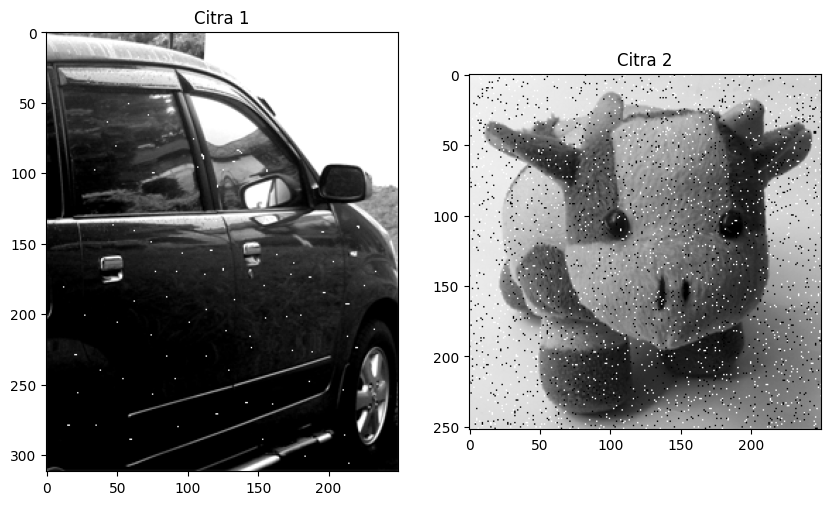

In [2]:
# Membaca citra menggunakan imread
citra1 = imread("mobil.tif")
citra2 = imread("boneka2.tif")

#Menampilkan dimensi citra pertama dan kedua menggunakan atribut shape
print('Shape citra 1 : ', citra1.shape)
print('Shape citra 2 : ', citra2.shape)

#Membuat sebuah figure dengan satu baris dan dua kolom
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
ax = axes.ravel()

#Menampilkan citra pertama pada sumbu pertama dengan imshow()
ax[0].imshow(citra1, cmap = 'gray')
ax[0].set_title("Citra 1")

#Menampilkan citra kedua pada sumbu kedua dengan imshow()
ax[1].imshow(citra2, cmap = 'gray')
ax[1].set_title("Citra 2")

Code Asal Matlab

In [3]:
#%proses filter median untuk citra mobil
#for baris=2 : tinggiA-1
#    for kolom=2 : lebarA-1
#        dataA = [inputMobil(baris-1, kolom-1) inputMobil(baris-1, kolom) inputMobil(baris-1, kolom+1)  ...
#              inputMobil(baris, kolom-1) inputMobil(baris, kolom) inputMobil(baris, kolom+1)  ...
#              inputMobil(baris+1, kolom-1) inputMobil(baris+1, kolom) inputMobil(baris+1, kolom+1)];
#        % Urutkan
#        for i=1 : 8
#            for j=i+1 : 9
#                if dataA(i) > dataA(j)
#                    tmpA = dataA(i);
#                    dataA(i) = dataA(j);
#                    dataA(j) = tmpA;
#                end
#            end
#        end      
#        % Ambil nilai median
#        outputMobil(baris, kolom) = dataA(5);
#    end
#end

Menyiapkan variable output

In [4]:
# Membuat salinan dari citra 1 dan citra 2
copyCitra1 = citra1.copy()
copyCitra2 = citra2.copy()

# Mendapatkan dimensi dari salinan citra 1 dan citra 2
m1,n1 = copyCitra1.shape
output1 = np.empty([m1, n1])

m2,n2 = copyCitra2.shape
output2 = np.empty([m2, n2])

# Menampilkan shape dari salinan citra 1 dan output citra 1
print('Shape copy citra 1 : ', copyCitra1.shape)
print('Shape output citra 1 : ', output1.shape)

print('m1 : ',m1)
print('n1 : ',n1)
print()

# Menampilkan shape dari salinan citra 2 dan output citra 2
print('Shape copy citra 2 : ', copyCitra2.shape)
print('Shape output citra 3 : ', output2.shape)
print('m2 : ',m2)
print('n2 : ',n2)
print()

Shape copy citra 1 :  (312, 250)
Shape output citra 1 :  (312, 250)
m1 :  312
n1 :  250

Shape copy citra 2 :  (252, 250)
Shape output citra 3 :  (252, 250)
m2 :  252
n2 :  250



Proses Filter Median Pada Citra Input 1

In [5]:
# Melakukan operasi pemrosesan citra pada citra 1
for baris in range(0, m1-1):
    for kolom in range(0, n1-1):
        a1 = baris
        b1 = kolom
        # Mendapatkan nilai piksel tetangga sekitar citra 1
        dataA = [copyCitra1[a1-1, b1-1], copyCitra1[a1-1, b1], copyCitra1[a1-1, b1+1], \
                 copyCitra1[a1, b1-1], copyCitra1[a1, b1], copyCitra1[a1, b1+1], \
                 copyCitra1[a1+1, b1-1], copyCitra1[a1+1, b1], copyCitra1[a1+1, b1+1]]
        
        # Mengurutkan nilai piksel tetangga
        for i in range(1, 8):
            for j in range(i, 9):
                if dataA[i] > dataA[j]:
                    tmpA = dataA[i];
                    dataA[i] = dataA[j];
                    dataA[j]= tmpA;
        
        output1[a1, b1] = dataA[5]

Proses Filter Median Pada Citra Input 2

In [6]:
# Melakukan operasi pemrosesan citra pada citra 2
for baris in range(0, m2-1):
    for kolom in range(0, n2-1):
        a1 = baris
        b1 = kolom
        # Mendapatkan nilai piksel tetangga sekitar citra 2
        dataA = [copyCitra2[a1-1, b1-1], copyCitra2[a1-1, b1], copyCitra2[a1-1, b1+1], \
                 copyCitra2[a1, b1-1], copyCitra2[a1, b1], copyCitra2[a1, b1+1], \
                 copyCitra2[a1+1, b1-1], copyCitra2[a1+1, b1], copyCitra2[a1+1, b1+1]]
        
        # Mengurutkan nilai piksel tetangga
        for i in range(1, 8):
            for j in range(i, 9):
                if dataA[i] > dataA[j]:
                    tmpA = dataA[i];
                    dataA[i] = dataA[j];
                    dataA[j]= tmpA;
        
        output2[a1, b1] = dataA[5]

Plot Citra Input dan Output Hasil dari Filter Rerata

Text(0.5, 1.0, 'Output Citra 2')

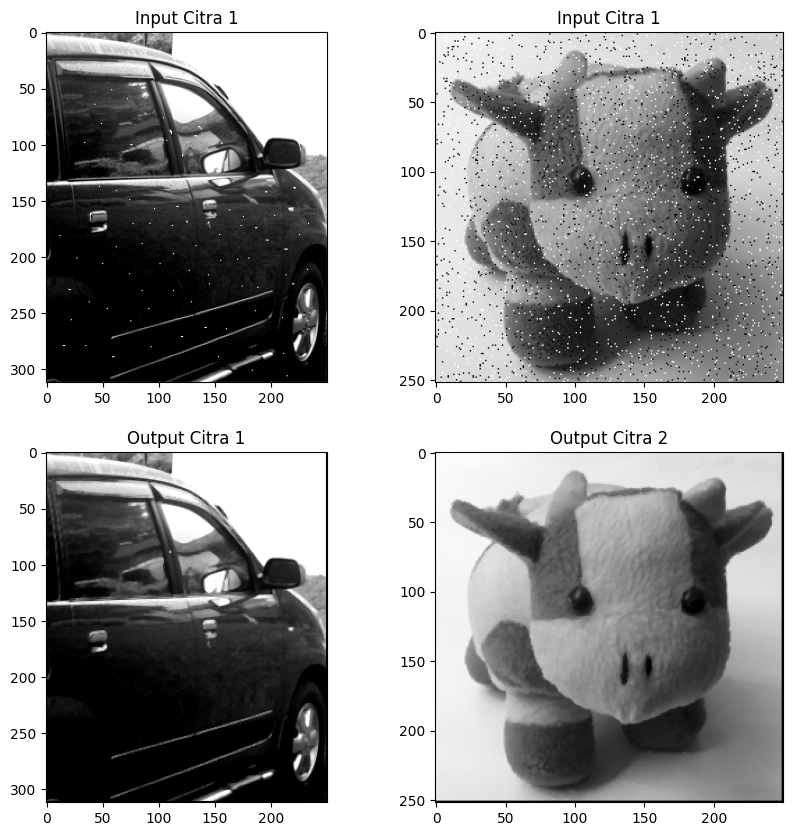

In [7]:
# Membuat subplot untuk menampilkan citra input dan citra output
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
ax = axes.ravel()

# Menampilkan citra input 1
ax[0].imshow(citra1, cmap = 'gray')
ax[0].set_title("Input Citra 1")

# Menampilkan citra input 2
ax[1].imshow(citra2, cmap = 'gray')
ax[1].set_title("Input Citra 1")

# Menampilkan citra output 1
ax[2].imshow(output1, cmap = 'gray')
ax[2].set_title("Output Citra 1")

# Menampilkan citra output 2
ax[3].imshow(output2, cmap = 'gray')
ax[3].set_title("Output Citra 2")